<a href="https://colab.research.google.com/github/rajagopalmotivate/AIPhysics/blob/master/Try_2D_PES_HPC_H3_works_well_ver10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple comparision of DFT vs NN 
## Hypothesis: NN performs as good as DFT 
## Experiment: Compare 

## Step 1: Install

In [1]:
#!pip install git+git://github.com/deepmind/deepmind-research.git#subdirectory=density_functional_approximation_dm21

In [ ]:
!git clone https://github.com/deepmind/deepmind-research.git


In [3]:
cd deepmind-research/density_functional_approximation_dm21


/content/deepmind-research/density_functional_approximation_dm21


In [4]:
pwd

'/content/deepmind-research/density_functional_approximation_dm21'

In [ ]:
!pip install .


In [ ]:
!pip install pyscf==2.0.0


rajagopal.motivate2@gmail.com


In [299]:
EXPNO ='H3_Exp2000'

dictPeriodicTable = {'H': 1}
 
elementname ='H' 

dictPeriodicTable = {'F': 9}
 
elementname ='F' 

In [300]:
isDebug = False  


In [301]:

functionalsList = ['b3lyp','M06-2X' , 'SCAN'    ,'wB97X-V',  'PW6B95' ,  'pbe' ,  'pbe0']

functionalsList = [ 'b3lyp', 'SCAN'  , 'wB97X-V'  , 'pbe', 'M06-2X' ,'PW6B95'  ]

functionalsList = [ 'b3lyp',  'wB97X-V' , 'SCAN'  ,   'pbe'  ]

functionalsList = ['b3lyp']

In [302]:
ComputeThisInThisRUN = 'NN' #@param ["DFT", "CCST", "NN"]


In [303]:
CHOOSENaaFunctional = 'b3lyp' #@param ["b3lyp", "wB97X-V" ]

functionalsList =[CHOOSENaaFunctional]

In [304]:
CHOOSENaNNFunctional = 'Functional.DM21m' #@param ["Functional.DM21m" ]



In [305]:
firstTimeorRestart = False

In [306]:
lookforAlreadyCompletedHINT = 'RESTART_HINT_WORD'
if ComputeThisInThisRUN == 'DFT':
  lookforAlreadyCompletedHINT = 'DFT-' +  CHOOSENaaFunctional

if ComputeThisInThisRUN == 'CCST':
  lookforAlreadyCompletedHINT = 'CCST'  

if ComputeThisInThisRUN == 'NN':
  lookforAlreadyCompletedHINT = 'NN-' +   CHOOSENaNNFunctional

print("LOOKING FOR " + lookforAlreadyCompletedHINT)


LOOKING FOR NN-Functional.DM21m


In [219]:
moleculegeomtryTemplateinZmatrix = '''
          O
          H  1  BONDLENGHTOH
          H  1  BONDLENGHTOH  2 ANGLEOHO
          '''

In [220]:
moleculegeomtryTemplateinZmatrix = '''
          H
          O  1  BONDLENGHTOH1
          Li  2  BONDLENGHTOH2  1 180
          '''

In [221]:
moleculegeomtryTemplateinZmatrix = '''
          H
          O  1  BONDLENGHTOH
          Li  2  ANGLEOHO  1 90
          '''

In [222]:
moleculegeomtryTemplateinZmatrix = '''
          H
          Li  1  BONDLENGHTOH
          O  2  ANGLEOHO  1 90
          '''

In [307]:
moleculegeomtryTemplateinZmatrix = '''
          H
          H  1  BONDLENGHTOH
          H  2  ANGLEOHO  1 180
          '''

H1 --1.1--   H2 -10-- H3

1 H  
2 H   1    1.1 
3 H   2    10     1    180 

https://www.youtube.com/watch?v=iVP3aiZ96Ho z matrix

In [224]:

import numpy as np
import pandas as pd

In [308]:
Global_Range_BONDANGLE_OHO = np.arange(0.1, 3, 0.2, dtype=float )

Global_Range_BONDANGLE_OHO = np.arange(0.1, 1.5, 0.1, dtype=float )

Global_Range_BONDANGLE_OHO = np.arange(0.1, 1.5, 0.05, dtype=float )


In [309]:
Global_Range_BONDLENGTH_HO = np.arange(0.1, 3, 0.2, dtype=float)

Global_Range_BONDLENGTH_HO = np.arange(0.1, 1, 0.1, dtype=float)

Global_Range_BONDLENGTH_HO = np.arange(0.1, 1.5, 0.05, dtype=float)



In [227]:
Global_Range_BONDANGLE_OHO = np.round (Global_Range_BONDANGLE_OHO, 3)
Global_Range_BONDLENGTH_HO = np.round (Global_Range_BONDLENGTH_HO, 3)

In [228]:
len(Global_Range_BONDLENGTH_HO)

28

In [229]:
Global_Range_BONDANGLE_OHO

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45])

In [230]:
len([*Global_Range_BONDANGLE_OHO] )

28

In [231]:
Global_Range_BONDLENGTH_HO

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45])

In [232]:
moleculegeomtryTemplateinZmatrix

'\n          H\n          H  1  BONDLENGHTOH\n          H  2  ANGLEOHO  1 180\n          '

In [310]:
listBasisSet = ['def2-QZVP' , 'cc-pCVTZ' ,  'aug-pc-3' , 'aug-cc-pV(Q+d)Z', 'aug-cc-pCV5Z', 'aug-ccpwCV5Z', '6-21g']

listBasisSet = ['cc-pCVDZ' , 'def2-QZVP' , 'cc-pCVTZ' ,  'aug-pc-3' , 'aug-cc-pV(Q+d)Z', 'aug-cc-pCV5Z', 'aug-ccpwCV5Z', '6-31g', 'STO-3G' , 'def2-QZVPPD' ]

listBasisSet = [   'cc-pVDZ' ]




In [311]:
BASISSETTOUSE =   'cc-pVDZ'

In [312]:
def downloadBasisSetAutoVersion(ElementsinMolecule, BasisSet):  
    for versionumber in range (0,4):
      target_url = 'https://www.basissetexchange.org/api/basis/' + str(BasisSet) +  '/format/nwchem/?version='+ str( versionumber)+'&elements=' + str(ElementsinMolecule) 
      try:
        textfile = urllib.request.urlopen(target_url)    
        mydownloadedfile = ""
        for line in textfile:
            #print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
            mydownloadedfile += line.decode('utf-8') 
        return mydownloadedfile    
      except:
        return None

In [236]:
!pip install py3Dmol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [237]:

import py3Dmol
 

#  basis set and as per DM21 authors
For all benchmarking, we use the large aug'-def2-QZVP basis set  

During training, 
For all the atoms and diatomic molecules in the regression set we generate the features for
the SCF loss at PySCF grid level 2 and use the largest basis set in the aug-pc-X family such
that the number of basis functions is less than 128. 
For larger neutral molecules we use grid
level 1 and the largest basis set with less than 128 basis functions from cc-pCV(Q+d)Z, ccpCV(T+d)Z, cc-pV(T+d)Z or cc-pV(D+d)Z

In [238]:
dictPeriodicTableSpinValues = {'H': 1,  'He': 0, 'Li': 1, 'Be': 0, 'B': 1, 'C': 0, 'N': 1, 'O': 0, 'F': 1, 'Cl': 0 }

In [239]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [240]:
import pandas as pd

 

In [313]:
if firstTimeorRestart == False:
  #df = pd.read_csv('/content/drive/My Drive/DeepMind' + EXPNO+ 'CE-Final-.csv' )
  dfRestart = pd.read_csv('/content/drive/My Drive/tryDeepMind' + EXPNO+ 'CE-temp2D-.csv' )
  dfRestart2 = dfRestart.drop_duplicates(keep='first')
  dfRestart = dfRestart2
  

In [ ]:
dfRestart

## Step 2: Configure RAM optionally

In [244]:
from pyscf import gto
from pyscf import dft

from pyscf import __config__
MAX_MEMORY = getattr(__config__, 'MAX_MEMORY')
MAX_MEMORY

112787

In [245]:
import psutil
systemresources = psutil.virtual_memory()

MAX_MEMORY = round( systemresources.available  * 0.000009)
PYSCF_MAX_MEMORY  = MAX_MEMORY

print('Configured to use max RAM resources of  ' + str(MAX_MEMORY))

Configured to use max RAM resources of  112491


In [246]:
setattr(__config__, 'MAX_MEMORY', PYSCF_MAX_MEMORY)

setattr(__config__, 'PYSCF_MAX_MEMORY', PYSCF_MAX_MEMORY)



In [247]:
MAX_MEMORY = getattr(__config__, 'MAX_MEMORY')
MAX_MEMORY

112491

## Step 3: 

### 3.1 Define the periodic table (Define atomic weight and periodic weight for each element)

### 3.2 Define the spin value for each element 

### 3.3 You can load any new basis function.  Just visit the Basics Exchange and get a new Basis Function URL .  
#### here we download a basis set full defintion file from an URL and then use it to construct a molecule  

#### To get a web URL, just visit https://www.basissetexchange.org/


http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf 

https://youtu.be/irQ_c_fW5f8?t=971


1.   cc-pCVXZ or aug-cc-pCVXZ basis sets;  you should use basis sets like this if you do not freeze core
2.   cc-pVQZ is great for CCSD(T)



In [248]:
def trydownloadingBasisSet(ElementsinMolecule, BasisSet, versionno):  
    target_url = 'https://www.basissetexchange.org/api/basis/' + str(BasisSet) +  '/format/nwchem/?version='+ str( versionno)+'&elements=' + str(ElementsinMolecule) 
    #print(target_url)
    try:
      textfile = urllib.request.urlopen(target_url)    
      mydownloadedfile = ""
      for line in textfile:
          #print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
          mydownloadedfile += line.decode('utf-8') 
      return True    
    except:
      return False

In [249]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff


def getValidBasisSet(MoleculeList):
  ValidatedBasisSet = []
  ValBSSetVersionNumberDict = {}
  errorproneBasisSet = []
  for BasisSet in listBasisSet:
    didnotworkatallforanyversion = True
    for versionno in range(0,4):
      isworking = trydownloadingBasisSet(MoleculeList, BasisSet, versionno)
      if isworking == True:
        didnotworkatallforanyversion = False
        ValBSSetVersionNumberDict[BasisSet] = versionno
        ValidatedBasisSet.append(BasisSet)
        break
    if didnotworkatallforanyversion == True:
      errorproneBasisSet.append(BasisSet)
  return ValidatedBasisSet 

In [250]:

PerdiocTableNumber = dictPeriodicTable [elementname]
ValidatedBasisSet = getValidBasisSet(PerdiocTableNumber)
len(ValidatedBasisSet)
ValidatedBasisSet

['cc-pVDZ']

In [251]:
basisSethandpicked =[  ]

In [252]:
#listBasisSet = basisSet652

In [253]:
try:
  print("Hello")
except:
  print("Something went wrong")
else:
  print("Nothing went wrong")

Hello
Nothing went wrong


In [254]:
#downloadBasisSetAutoVersion(1,'3-21G')

geomtery optimization

In [255]:
!	pip install -U pyberny


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [256]:
from pyscf import gto
from pyscf import scf
from pyscf import cc
from pyscf.cc import ccsd_t_lambda_slow as ccsd_t_lambda
from pyscf.grad import ccsd_t as ccsd_t_grad
from pyscf.geomopt import berny_solver

def f_usefforberny_solver(mol):
    # Compute CCSD(T) energy
    mf = scf.RHF(mol).run()
    mycc = cc.CCSD(mf).run()
    et_correction = mycc.ccsd_t()
    e_tot = mycc.e_tot + et_correction

    # Compute CCSD(T) gradients
    g = ccsd_t_grad.Gradients(mycc).kernel()
    print('CCSD(T) nuclear gradients:')
    print(g)
    return e_tot, g


In [257]:
 hashLookUpMolecules = dict()
 

In [258]:
def GetoptimizedMolecule(randomMol):
  global hashLookUpMolecules
  print('****************************************************************GEOMENTRY OPTIMIZATION Starts***********************************************')  
  print('MOLECULE KEY is')
  print([randomMol.basis])
  if randomMol in hashLookUpMolecules:
    saved_mol = hashLookUpMolecules[randomMol]
    print('****************************************************************GEOMENTRY looked up from Hashtable***********************************************')  
    return saved_mol
  fake_method = berny_solver.as_pyscf_method(randomMol, f_usefforberny_solver)
  new_mol = berny_solver.optimize(fake_method , maxsteps=400)
  print('Old geometry (Bohr)')
  print(randomMol.atom_coords())  
  print('New geometry (Bohr)')
  print(new_mol.atom_coords())  
  hashLookUpMolecules[randomMol] = new_mol
  print('****************************************************************GEOMENTRY OPTIMIZATION Ends***********************************************')  
  return new_mol


DM21

In [259]:
import density_functional_approximation_dm21 as dm21
from pyscf import gto
from pyscf import dft

In [260]:
GlobalBONDLENGTH = .98

In [261]:
Global_Range_BONDLENGTH_HO_Array = []

In [262]:
for lengthHO in Global_Range_BONDLENGTH_HO:
  temp =   Global_Range_BONDLENGTH_HO_Array 


In [263]:
Global_Range_BONDLENGTH_HO

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45])

In [264]:
# 
GlobalBONDANGLE_OHO = 0


In [265]:
def getMoleculeGeomtry():
  #print(moleculegeomtryTemplateinZmatrix)
  #GlobalBONDANGLE_OHO = round(GlobalBONDANGLE_OHO, 3)
  #GlobalBONDLENGTH = round (GlobalBONDLENGTH, 3)
  moleculegeomtry = moleculegeomtryTemplateinZmatrix.replace('ANGLEOHO', str(GlobalBONDANGLE_OHO))
  moleculegeomtry = moleculegeomtry.replace('BONDLENGHTOH', str(GlobalBONDLENGTH) )
  #print(moleculegeomtry)
  return moleculegeomtry


In [266]:
def buildaMoleculeSpinfor2DPES(elementname, elementname2, mydownloadedfile, mydownloadedfile2, trythisspin ):
      global GlobalBONDLENGTH
      mol = gto.Mole()     
#      mol.atom = [[elementname, ( 0, 0, GlobalBONDLENGTH)], [elementname2, (0, 0, -1* GlobalBONDLENGTH)] ]
      mol.atom = getMoleculeGeomtry() 

      mol.spin =  trythisspin
      mol.symmetry = True
     # mol.basis = { elementname: gto.parse(mydownloadedfile)  ,     elementname2: gto.parse(mydownloadedfile2)        }
      mol.basis = BASISSETTOUSE
      mol.charge = 0
      #mol.max_memory = PYSCF_MAX_MEMORY
      mol.build()
     # print( mol.atom_coords() )
      return mol

In [267]:
def buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname2, mydownloadedfile , mydownloadedfile2 ):
  molecule = None 
  for spinvaluecheckthis in range(5):
    try:
      molecule = buildaMoleculeSpinfor2DPES(elementname,elementname2, mydownloadedfile, mydownloadedfile2, spinvaluecheckthis )      
      return molecule, spinvaluecheckthis
      break
    except:
      tempexcept = True
      #print('SPIN is not correct. Auto matically trying another spin value...')
    else:
      tempelse = True
      #print('TRYING SPIN')
  return molecule, spinvaluecheckthis
 


In [ ]:
mydownloadedfile = downloadBasisSetAutoVersion(PerdiocTableNumber,BASISSETTOUSE)      
if True:
  if True:
    for elementname in dictPeriodicTable.keys():
      for lengthHO in Global_Range_BONDLENGTH_HO:
        for angle1 in Global_Range_BONDANGLE_OHO:
          GlobalBONDANGLE_OHO = angle1
          GlobalBONDLENGTH =  lengthHO
          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(GlobalBONDLENGTH))          
          print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))
          molUnoptimized, myspin = buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname, mydownloadedfile , mydownloadedfile )
          if molUnoptimized != None:
            print('.............................................Molecule Geometry......................................................')
           # print(molUnoptimized.atom_coords(unit='ANG'))
            print(molUnoptimized.tostring(format='xyz'))
            
            xyz = molUnoptimized.tostring(format='xyz')
            xyzview = py3Dmol.view(width=400,height=400)
            xyzview.addModel(xyz , 'xyz')
            xyzview.setStyle({'stick':{}})
            xyzview.show()
            break
          

In [269]:
def buildaMoleculeSpinMOLECULEELEMENTCOUNT1(elementname, mydownloadedfile,  trythisspin ):
      mol = gto.Mole()
      #mol.atom = '''H 0 0 0'''
      mol.atom = [[elementname, (0, 0, 0)] ]
      mol.spin =  trythisspin
      mol.basis = { elementname: gto.parse(mydownloadedfile)       }
      mol.build()
      return mol

In [270]:
def buildaMoleculeTryMOLECULEELEMENTCOUNT1(elementname,  mydownloadedfile ):
  molecule = None 
  for spinvaluecheckthis in range(5):
    try:
      molecule = buildaMoleculeSpinMOLECULEELEMENTCOUNT1(elementname, mydownloadedfile, spinvaluecheckthis )      
      return molecule, spinvaluecheckthis
      break
    except:
      tempexcept = True
      #print('SPIN is not correct. Auto matically trying another spin value...')
    else:
      tempelse = True
      #print('TRYING SPIN')
  return molecule, spinvaluecheckthis
 


## Step 4: Expected format of output table 

## Step 5. Input values to be considered in this computation  

## Step 6. Compute Results
## Run the computation for the above input values 

In [271]:
from pyscf import dft

# DFT computation of SCF energy  
def SCFenergyFunctionalsbasedonDFTGOLD(mol , functionals ):
  if mol.spin == 0:
    mf = dft.RKS(mol)
  else:
    mf = dft.UKS(mol)
  # functional.
  #mf.xc = 'B3LYP'
  mf.max_memory = PYSCF_MAX_MEMORY
  mf.xc = functionals
  # Run the DFT calculation.
  answerDFT = mf.kernel()
  return answerDFT



In [272]:

# DFT computation of SCF energy  
def SCFenergyFunctionalsbasedonDFT(mol , functionals ):
    mf = mol.KS()
   # mf.xc = 'b3lyp'
   # mf.xc = 'pbe0'
   # mf.xc = 'M06-2X'
   # mf.xc = 'SCAN'    
   # mf.xc = 'wB97X-V'
   # mf.xc = 'PW6B95'
    mf.xc = functionals
    # Run the DFT calculation.
    answerDFT = mf.kernel()
    return answerDFT

In [273]:
def SCFenergyFunctionalsbasedonNNGOLD(mol,  NNfunctionals ):
    if mol.spin == 0:
      mf = dft.RKS(mol)
    else:
      mf = dft.UKS(mol)
    #mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21m )
    mf._numint = dm21.NeuralNumInt(NNfunctionals)
    mf.max_memory = PYSCF_MAX_MEMORY
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [274]:
def SCFenergyFunctionalsbasedonNN(mol,  NNfunctionals, functionals='b3lyp'):
    mf = mol.KS()
    mf.xc = functionals
    #mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21m )
    mf._numint = dm21.NeuralNumInt(NNfunctionals)
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [275]:
# DFT computation of SCF energy  
def SCFenergybasedonDFT(mol):
    mf = dft.RKS(mol)
    # Run the DFT calculation.
    answerDFT = mf.kernel()
    return answerDFT

In [276]:
# Neural network based prediction of SCF energy   
def SCFenergybasedonNN(mol):
    mf = dft.RKS(mol)
    mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21)
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [277]:
# CCSD computation 
def SCFenergybasedonCCSD(mol):
  ccsdanswer = mol.apply('CCSD').run().e_tot
  return ccsdanswer

In [278]:
from pyscf import  scf, cc

# CCSD-T computation 
def SCFenergybasedonCCSDTGOLD(mol):
  try:
    mf = scf.HF(mol).run()
    mf.max_memory = PYSCF_MAX_MEMORY
    mycc = cc.CCSD(mf).run()
    #print('CCSD  energy', mycc.e_tot)
    et = mycc.ccsd_t()
    CCSDTotal = mycc.e_tot + et
  except ZeroDivisionError:
    print('000000000000000000000000000000000000000-------CCSDT Error------------00000000000000000000000. Using CCSD')
    return SCFenergybasedonCCSD(mol)
  #print('CCSD(T) total energy', mycc.e_tot + et)
  return CCSDTotal

  

In [279]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff
import numpy
from google.colab import files


print( 'No'  + '        ' + 'Element' + '    \t  \t \t ' +  'Basis Set')



No        Element    	  	 	 Basis Set


In [280]:
ValidatedBasisSetSOURCE = getValidBasisSet(PerdiocTableNumber)


In [281]:


def compute1Mol1BasisSet(elementname, ValidatedBasisSetStart , df):
  if True:
    PerdiocTableNumber = dictPeriodicTable [elementname]
    ValidatedBasisSet = ValidatedBasisSetSOURCE[ValidatedBasisSetStart:ValidatedBasisSetStart+1]
    for BasisSet in ValidatedBasisSet:    
      print('***********************************************************')
      print('***********************************************************')
      print('***********************************************************')

####      mydownloadedfile = downloadBasisSetAutoVersion(PerdiocTableNumber,BasisSet)      
      molUnoptimized, myspin = buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname, None , None )
      if molUnoptimized == None:
        return df

      print('.............................................Molecule Geometry......................................................')
#      print('In Bohr')
#      print(molUnoptimized.atom_coords(unit='Bohr'))
#      print('In angstrom')
#      print(molUnoptimized.atom_coords(unit='ANG'))
#      print(molUnoptimized)


     # mol = GetoptimizedMolecule(molUnoptimized)
      mol = molUnoptimized
        
      print(mol.atom)
   #   print(mol.atom_coords(unit='Bohr'))
      print(mol.basis)



      print('.............................................COMPUTING SCF energy......................................................')

      aResultDict = computePart(mol )


      aResultDict['BasisSet'] = [BasisSet]

      dfforOneElement = pd.DataFrame(aResultDict )

      

      df = df.append(dfforOneElement, ignore_index = True)

      return df


    #  files.download('ComputedEnergy'+str(ValidatedBasisSetStart)+'.csv')


      


In [282]:



def computePart(mol):
  global DFT_energies 
  global NN_engeries 
  global CCSD_energies 
  global CCSD_Tenergies 
  global fci_energies 
  global bond_lengths 
  global Mole_bond_defintions 


  if True:
      aResultDict = {}
      aResultDict['bond_lenght'] = GlobalBONDLENGTH  
      aResultDict['bond_Angle'] =    GlobalBONDANGLE_OHO
      aResultDict['Molecule'] = [mol.atom]
      aResultDict['Spin'] = [mol.spin]
      aResultDict['BuiltMolecule'] = [  mol.basis   ]

      if ComputeThisInThisRUN == 'NN': 
        print('++++++++++++++++++++++++++++++++++++++++++++++++++  DM21 Functionals ++++++++++++++++++++++++++++++++++')
        for aDMFunctionalvalue in dm21.Functional:
          if str(aDMFunctionalvalue) ==  'Functional.DM21m' :           
          #if True:
            ans = SCFenergyFunctionalsbasedonNNGOLD(mol, aDMFunctionalvalue)
            aResultDict['NN-'+str(aDMFunctionalvalue)] = ans    
            NN_engeries += [ans]

      if ComputeThisInThisRUN == 'DFT': 
        print('++++++++++++++++++++++++++++++++++++++++++++++++++  DFT Functionals ++++++++++++++++++++++++++++++++++')
        for afunctionals in functionalsList:
          ans = SCFenergyFunctionalsbasedonDFTGOLD(mol, afunctionals)
          aResultDict['DFT-'+str(afunctionals)] = ans    
          DFT_energies += [ans]


      if ComputeThisInThisRUN == 'CCST': 
        print('++++++++++++++++++++++++++++++++++++++++++++++++++  CCSD ++++++++++++++++++++++++++++++++++')
        # Run the CCSD calculation.
        CCSDenergy = SCFenergybasedonCCSD(mol)
      # print('ENERGY Computing using CCSD appoach is = ' + str(CCSDenergy ))
        print('++++++++++++++++++++++++++++++++++++++++++++++++++  CCSD(T) ++++++++++++++++++++++++++++++++++')
        CCSDTenergy = SCFenergybasedonCCSDTGOLD(mol)
        print('ENERGY Computing using CCSD T appoach is = ' + str(CCSDTenergy ))
        #aResultDict['DFTApproach'] = answerDFT
        #aResultDict['NNApproach'] = answerNN
        aResultDict['CCSD'] = CCSDenergy
        aResultDict['CCSDT'] = CCSDTenergy
      # CCSD_energies += [CCSDenergy]
        CCSD_Tenergies += [CCSDTenergy]


      return aResultDict




  


In [283]:
if firstTimeorRestart == True:
  df = pd.DataFrame(columns = ['Weight', 'Element', 'Molecule', 'BasisSet','Spin', 'BuiltMolecule' ])
else: 
  df = dfRestart 
 

In [284]:
DFT_energies = []
NN_engeries = []
CCSD_energies = []
CCSD_Tenergies = []
fci_energies = []
bond_lengths = []
bond_angles = []
Mole_bond_defintions = []

In [ ]:
if True:
  if True:
    for elementname in dictPeriodicTable.keys():
      for lengthHO in Global_Range_BONDLENGTH_HO:
        for angle1 in Global_Range_BONDANGLE_OHO:
          GlobalBONDANGLE_OHO = angle1
          GlobalBONDLENGTH =  lengthHO
          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(GlobalBONDLENGTH))          
          print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))
          bond_lengths += [GlobalBONDANGLE_OHO]

In [ ]:
print(Global_Range_BONDLENGTH_HO)

type(Global_Range_BONDLENGTH_HO)

Global_Range_BONDLENGTH_HO[1]

In [ ]:
      for lengthHO in Global_Range_BONDLENGTH_HO:
          GlobalBONDLENGTH =  lengthHO
          print( GlobalBONDLENGTH)       


In [288]:
pausehere

NameError: ignored

#3D plots 
https://colab.research.google.com/drive/1qz-fzzZYgb2RScGJM5f-VQCPt28ydfSi?usp=sharing

In [289]:
#n_points = 30
#bond_length_interval = 3.0 / n_points

In [290]:

if True:
  if firstTimeorRestart==True:
    for elementname in dictPeriodicTable.keys():
      for lengthHO in Global_Range_BONDLENGTH_HO:
        for angle1 in Global_Range_BONDANGLE_OHO:
          GlobalBONDANGLE_OHO = angle1
          GlobalBONDLENGTH =  lengthHO
          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(GlobalBONDLENGTH))          
          print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))
          df = compute1Mol1BasisSet(elementname, ValidatedBasisSetStart=0 , df=df)
          bond_lengths += [GlobalBONDANGLE_OHO]
        df.to_csv('/content/drive/My Drive/tryDeepMind' + EXPNO+ 'CE-temp2D-.csv' , index=False )

#  except :
 #   print('************************************************************WARNING*********************************** : EXCPETION.. continuing' )

In [291]:
def addColoumIfDoesnotExisit(adf):
  templocalmylistofcoloumnames = list(adf.columns.values)
  if not (lookforAlreadyCompletedHINT in templocalmylistofcoloumnames):
    adf[lookforAlreadyCompletedHINT] = float("nan")
  return adf 

In [ ]:
df

In [ ]:

if True:
  if firstTimeorRestart==False:
    dfCompare = df.copy(deep=True)
    dfCompare = dfCompare.round({'bond_Angle': 3, 'bond_lenght': 3})    
    dfCompare  = addColoumIfDoesnotExisit(dfCompare)    

    for elementname in dictPeriodicTable.keys():
      for lengthHO in Global_Range_BONDLENGTH_HO:
        for angle1 in Global_Range_BONDANGLE_OHO:
          GlobalBONDANGLE_OHO = angle1
          GlobalBONDLENGTH =  lengthHO
          temppppp = dfCompare.loc[  (dfCompare['bond_Angle'] == round(angle1, 3)) & (dfCompare['bond_lenght'] == round( lengthHO, 3))     ]  
          #if (len( temppppp['bond_lenght']) == 0):
          isalreadyComputed = False
          numberofrowsmatchingcriteria = len( temppppp[lookforAlreadyCompletedHINT]) 
          if numberofrowsmatchingcriteria == 0: 
            isalreadyComputed = False
          if numberofrowsmatchingcriteria >= 1: 
            tempparrayofDM21values = np.array(temppppp[lookforAlreadyCompletedHINT])
            if np.isnan(tempparrayofDM21values).all()  == True: 
              isalreadyComputed = False 
            else :
              isalreadyComputed = True 

          if (isalreadyComputed == False ):              
            print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(GlobalBONDLENGTH))          
            #print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))
            try:
              df = compute1Mol1BasisSet(elementname, ValidatedBasisSetStart = 0, df=df)
              df.to_csv('/content/drive/My Drive/tryDeepMind' + EXPNO+ 'CE-temp2D-.csv' , index=False)

              bond_lengths += [GlobalBONDANGLE_OHO]
            except:
              print('????????????????????????????? EXCEPTION ????????????????')
          
            

#  except :
 #   print('************************************************************WARNING*********************************** : EXCPETION.. continuing' )

In [ ]:
dfCompare

In [ ]:
df

In [ ]:
pausehere
if True:
  if firstTimeorRestart==False:
    dfCompare = df.copy(deep=True)
    dfCompare = dfCompare.round({'bond_Angle': 3, 'bond_lenght': 3})    
    dfCompare  = addColoumIfDoesnotExisit(dfCompare)    

    for elementname in dictPeriodicTable.keys():
      for lengthHO in Global_Range_BONDLENGTH_HO:
        for angle1 in Global_Range_BONDANGLE_OHO:
          GlobalBONDANGLE_OHO = angle1
          GlobalBONDLENGTH =  lengthHO
          temppppp = dfCompare.loc[  (dfCompare['bond_Angle'] == round(angle1, 3)) & (dfCompare['bond_lenght'] == round( lengthHO, 3))     ]  
          #if (len( temppppp['bond_lenght']) == 0):
          isalreadyComputed = False
          numberofrowsmatchingcriteria = len( temppppp[lookforAlreadyCompletedHINT]) 
          if numberofrowsmatchingcriteria == 0: 
            isalreadyComputed = False
          if numberofrowsmatchingcriteria >= 1: 
            tempparrayofDM21values = np.array(temppppp[lookforAlreadyCompletedHINT])
            if np.isnan(tempparrayofDM21values).all()  == True: 
              isalreadyComputed = False 
            else :
              isalreadyComputed = True 
          if (isalreadyComputed == False ):              
            print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(GlobalBONDLENGTH))          
            print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))
            try:
              df = compute1Mol1BasisSet(elementname, ValidatedBasisSetStart = 0, df=df)
              df.to_csv('/content/drive/My Drive/tryDeepMind' + EXPNO+ 'CE-temp2D-.csv' , index=False)

              bond_lengths += [GlobalBONDANGLE_OHO]
            except:
              print('????????????????????????????? EXCEPTION ????????????????')

#  except :
 #   print('************************************************************WARNING*********************************** : EXCPETION.. continuing' )

In [ ]:

if False==True:
  if firstTimeorRestart==False:
    dfCompare = df.copy(deep=True)
    dfCompare = dfCompare.round({'bond_Angle': 3, 'bond_lenght': 3})    
    dfCompare  = addColoumIfDoesnotExisit(dfCompare)    

    for elementname in dictPeriodicTable.keys():
      for lengthHO in Global_Range_BONDLENGTH_HO:
        for angle1 in Global_Range_BONDANGLE_OHO:
          GlobalBONDANGLE_OHO = angle1
          GlobalBONDLENGTH =  lengthHO
          temppppp = dfCompare.loc[  (dfCompare['bond_Angle'] == round(angle1, 3)) & (dfCompare['bond_lenght'] == round( lengthHO, 3))     ]  
          #if (len( temppppp['bond_lenght']) == 0):
          if (len( temppppp[lookforAlreadyCompletedHINT]) == 0):              
            print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(GlobalBONDLENGTH))          
            print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))
            df = compute1Mol1BasisSet(elementname, ValidatedBasisSetStart = 0, df=df)
            df.to_csv('/content/drive/My Drive/tryDeepMind' + EXPNO+ 'CE-temp2D-.csv' , index=False)

            bond_lengths += [GlobalBONDANGLE_OHO]

#  except :
 #   print('************************************************************WARNING*********************************** : EXCPETION.. continuing' )

In [ ]:
!pip install py3Dmol


In [ ]:

import py3Dmol
xyz = '''4
* (null), Energy   -1000.0000000
N     0.000005    0.019779   -0.000003   -0.157114    0.000052   -0.012746
H     0.931955   -0.364989    0.000003    1.507100   -0.601158   -0.004108
H    -0.465975   -0.364992    0.807088    0.283368    0.257996   -0.583024
H    -0.465979   -0.364991   -0.807088    0.392764    0.342436    0.764260
'''
xyzview = py3Dmol.view(width=400,height=400)
xyzview.addModel(xyz,'xyz',{'vibrate': {'frames':10,'amplitude':1}})
xyzview.setStyle({'stick':{}})
xyzview.setBackgroundColor('0xeeeeee')
#xyzview.animate({'loop': 'backAndForth'})
xyzview.zoomTo()
xyzview.show()

In [ ]:
Global_Range_BONDLENGTH_HO

In [ ]:
Global_Range_BONDANGLE_OHO

In [ ]:
df.to_csv('/content/drive/My Drive/tryDeepMind' + EXPNO+ 'CE-Final-.csv' , index=False )


In [315]:
import pandas as pd
#df = pd.read_csv('/content/drive/My Drive/DeepMind' + EXPNO+ 'CE-Final-.csv' )


In [316]:
df2 = df.copy()

In [ ]:
df.drop(columns=['Weight', 'Element', 'Molecule', 'BasisSet', 'Spin','BuiltMolecule'])

In [317]:
import  matplotlib.font_manager

flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print(names)

['Liberation Sans', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans Narrow', 'Humor Sans', 'Liberation Mono', 'Liberation Serif', 'Liberation Mono']


In [318]:
import matplotlib.pyplot as plt
%matplotlib inline

 

In [319]:
dfBACKUP = df.copy(deep=True)


In [320]:
dfDFT = dfBACKUP.copy(deep=True)

dfDFTnew = dfDFT[ dfDFT['DFT-b3lyp'].notnull()]

dfDFTnew = dfDFT[ dfDFT['NN-Functional.DM21m'].notnull()]
 

In [ ]:
df = dfDFTnew 
dfTest = df.drop(columns=['Weight', 'Element', 'Molecule', 'BasisSet', 'Spin','BuiltMolecule'])

In [ ]:
df


In [321]:
EnergyToPLOT = 'DFT-b3lyp'

EnergyToPLOT = 'NN-Functional.DM21m'


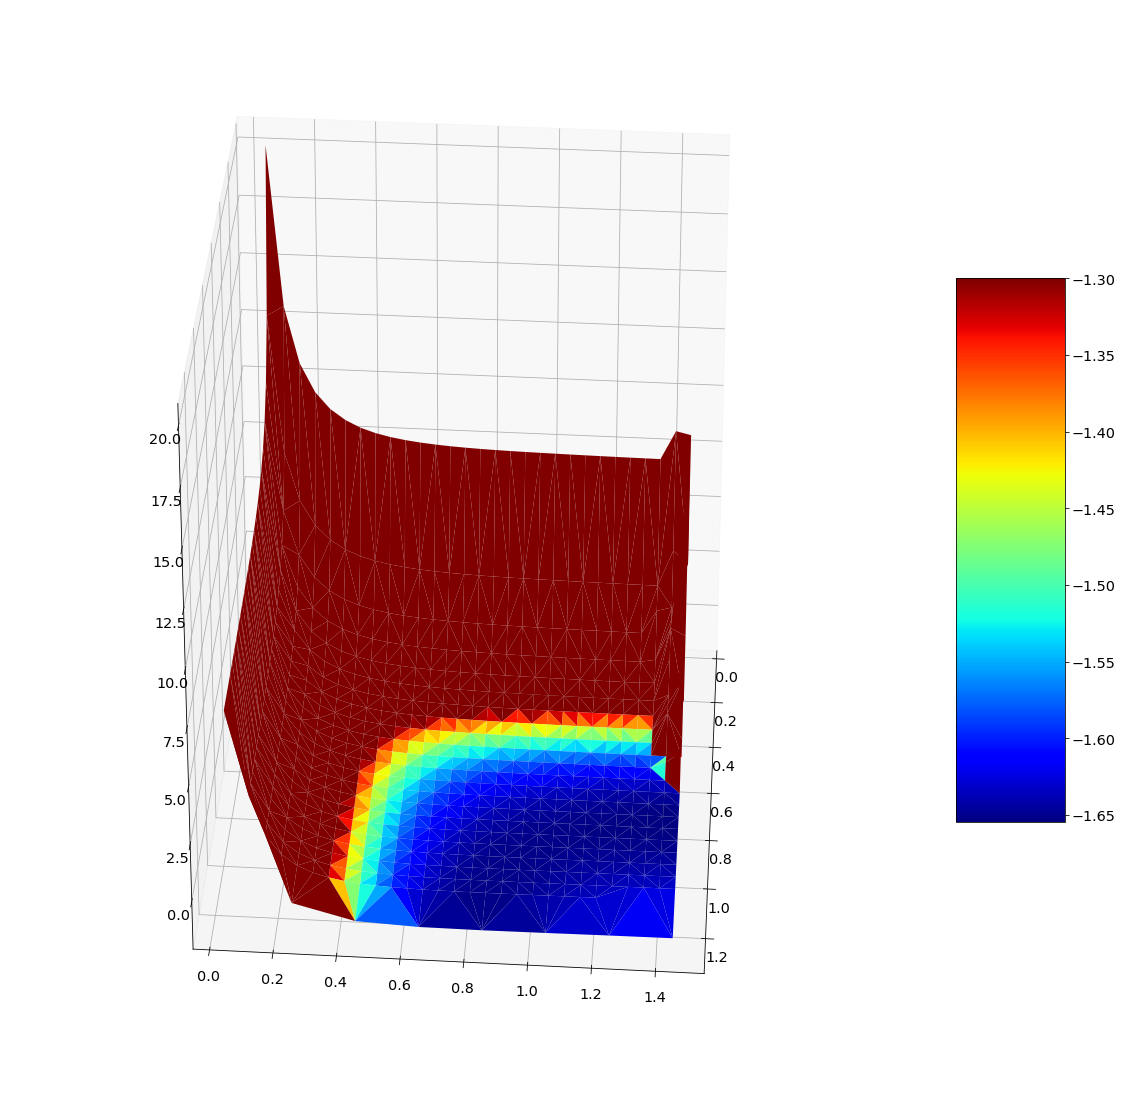

In [322]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(dfTest['bond_lenght'], dfTest['bond_Angle'], dfTest[EnergyToPLOT], vmax=-1.3,  cmap=plt.cm.jet,  antialiased=True,  linewidth=0.02)
ax.view_init(30, 4 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
import plotly.graph_objects as go

import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np

dftesting = df.copy(deep=True)
#dftesting = dftesting[ (dftesting['bond_lenght'] <= 1.09) &  (dftesting['bond_lenght'] >= 0.90) ] 
dftesting = dftesting[ (dftesting[EnergyToPLOT] <= -1.6)   ] 


x = dftesting['bond_lenght'].to_numpy()
y = dftesting['bond_Angle'].to_numpy()
z = dftesting[EnergyToPLOT].to_numpy()

marker=dict(
        size=3,
        color=z,                # set color to an array/list of desired values
        colorscale='Turbo',   # choose a colorscale Viridis Rainbow   Aggrnyl Turbo Plotly3 RdBu
        opacity=1
    )



fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker= marker)])


fig.show()

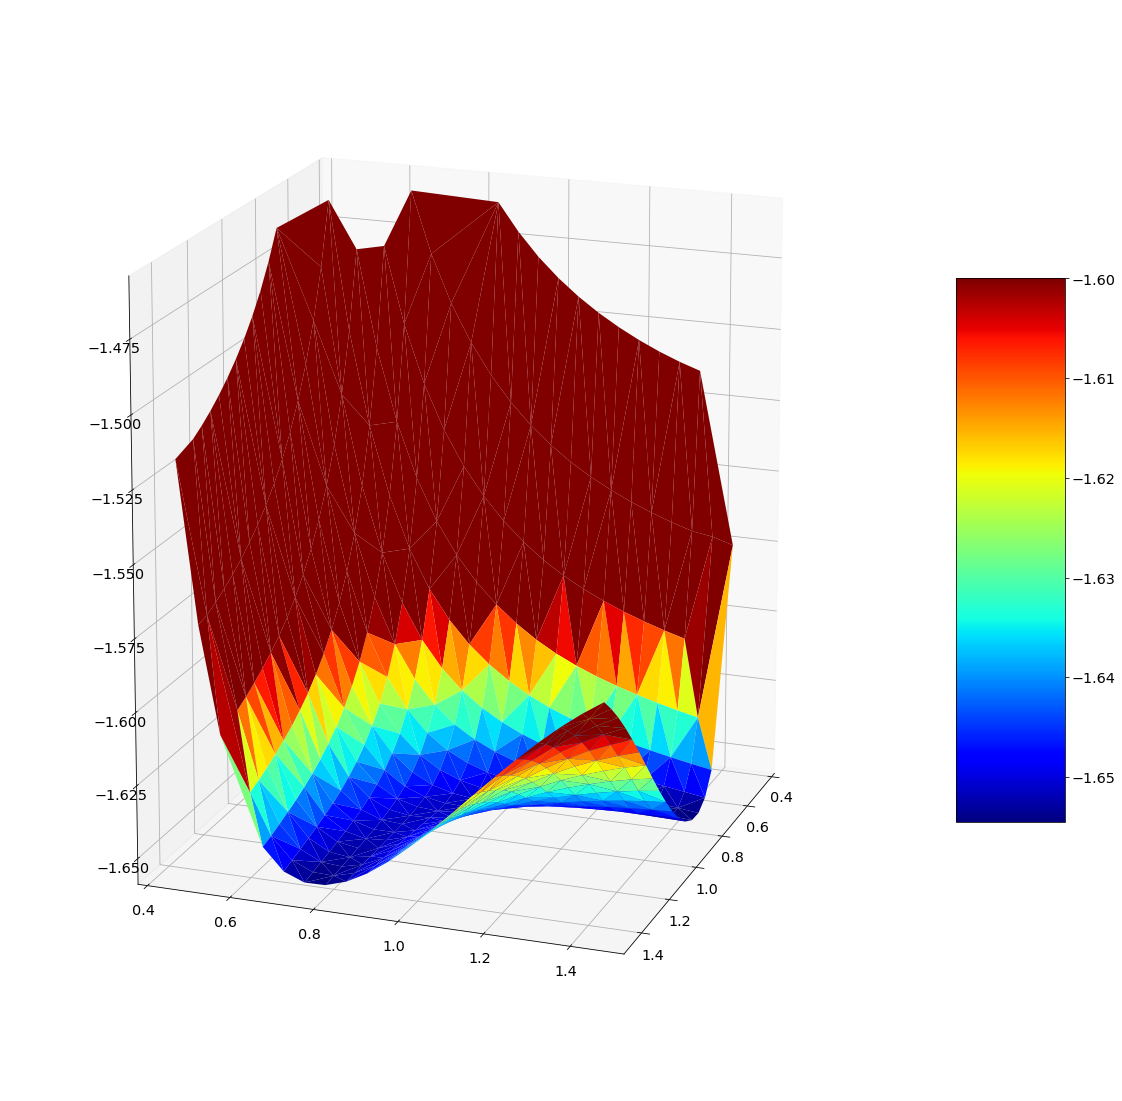

In [338]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')


dftesting = df.copy(deep=True)
#dftesting = dftesting[ (dftesting['bond_lenght'] <= 1.09) &  (dftesting['bond_lenght'] >= 0.90) ] 
dftesting = dftesting[ (dftesting[EnergyToPLOT] <= -1.45)   ] 

surf=ax.plot_trisurf(dftesting['bond_lenght'], dftesting['bond_Angle'], dftesting[EnergyToPLOT], cmap=plt.cm.jet,  linewidth=0.02, vmax=-1.60)
ax.view_init(15, 20 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(dftesting['bond_lenght'], dftesting['bond_Angle'], dftesting['DFT-b3lyp'], cmap=plt.cm.jet,  linewidth=0.02)
ax.view_init(60, 35 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['DFT-b3lyp'], vmax= -1.4,  cmap=plt.cm.jet,  linewidth=0.02)
ax.view_init(20, 15 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_surface(Z=myarray , X=Global_Range_BONDLENGTH_HO, Y=mylistofbonganglesarray , cmap=plt.cm.jet,  linewidth=0.02)
ax.view_init(20, 5 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_wireframe(Z=myarray , Y=Global_Range_BONDLENGTH_HO, X=mylistofbonganglesarray , cmap=plt.cm.jet,  linewidth=0.02)
ax.view_init(20, 5 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'], cmap=plt.cm.jet,  linewidth=0.02)
ax.view_init(30, 10 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
dftesting = df.copy(deep=True)
#dftesting = dftesting[ (dftesting['bond_lenght'] <= 1.09) &  (dftesting['bond_lenght'] >= 0.90) ] 

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(dftesting['bond_lenght'], dftesting['bond_Angle'], dftesting['NN-Functional.DM21m'], cmap=plt.cm.jet,  linewidth=0.01)
ax.view_init(10, 15 )

fig.colorbar( surf, shrink=0.5, aspect=10)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'], cmap=plt.cm.jet,  linewidth=0.02)
ax.view_init(-30, 40 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
import plotly.graph_objects as go

import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
x = dftesting['bond_lenght'].to_numpy()
y = dftesting['bond_Angle'].to_numpy()
z = dftesting['DFT-b3lyp'].to_numpy()

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightpink', alphahull=-1, opacity=0.50)])
fig.show()

In [ ]:


fig = go.Figure(data=[go.Surface(
    x=x,
    y=y,
    z=z,
    showscale=False,
    colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']]
    )])

fig.show()


In [ ]:
surf=dict(type='surface',
           x=x, 
           y=y,
           z=z             
)
fig = go.Figure(surf)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(dftesting, x=x, y=y, z=z,)
fig.show()

In [ ]:
import plotly.graph_objects as go

import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
x = df['bond_lenght'].to_numpy()
y = df['bond_Angle'].to_numpy()
z = df['DFT-b3lyp'].to_numpy()

marker=dict(
        size=3,
        color=z,                # set color to an array/list of desired values
        colorscale='Turbo',   # choose a colorscale Viridis Rainbow   Aggrnyl Turbo Plotly3 RdBu
        opacity=1
    )



fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker= marker)])


fig.show()

In [ ]:
w  = len(Global_Range_BONDANGLE_OHO)
h = len(Global_Range_BONDLENGTH_HO)

mylistofbongangles = list([*Global_Range_BONDANGLE_OHO])

mylistofbonganglesarray = np.array(mylistofbongangles)

In [ ]:
mylistofbongangles = list([*Global_Range_BONDANGLE_OHO])

mylistofbonganglesarray = np.array(mylistofbongangles)



In [ ]:
[*Global_Range_BONDANGLE_OHO]

In [ ]:
Global_Range_BONDLENGTH_HO

In [ ]:
h = len(Global_Range_BONDLENGTH_HO)
h

In [ ]:
Matrix = [[0.0 for x in range(w)] for y in range(h)] 
myarray = numpy.array(Matrix)

In [ ]:
myarray.shape

In [353]:
# Read data from a csv
dftesting = dftesting[ (dftesting[EnergyToPLOT] <= 1.1)   ] 

df2 = dftesting.copy(deep=True)

df5 =  df2[ [  EnergyToPLOT,  'bond_Angle', 'bond_lenght'  ] ]

In [354]:
df5 = df5.round({'bond_Angle': 3, 'bond_lenght': 3})

In [ ]:
df5

In [ ]:
w  = len(Global_Range_BONDANGLE_OHO)
h = len(Global_Range_BONDLENGTH_HO)

mylistofbongangles = list([*Global_Range_BONDANGLE_OHO])
mylistofbonganglesarray = np.array(mylistofbongangles)

Matrix = [[0.0 for x in range(w)] for y in range(h)] 
myarray = numpy.array(Matrix)

for i in range(0, len(ValidatedBasisSetSOURCE)):
  if True:
    for elementname in dictPeriodicTable.keys():
      bondlenghtcounter = -1 
      for lengthHO in Global_Range_BONDLENGTH_HO:
        bondlenghtcounter= bondlenghtcounter + 1 
        anglecounter = -1 
        for angle1 in Global_Range_BONDANGLE_OHO:
          anglecounter= anglecounter + 1 
          GlobalBONDANGLE_OHO = angle1
          GlobalBONDLENGTH =  lengthHO
#          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(lengthHO))          
#          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(round(lengthHO, 3)))          
      #    print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))
          temppppp = df5.loc[  (   df5['bond_Angle'] == round(angle1, 3)) & (df5['bond_lenght'] == round( lengthHO, 3))     ]  
#          temppppp = df5.loc[  (df5['bond_Angle'] == round(lengthHO, 3) )     ]       
          if (len( temppppp[EnergyToPLOT]) > 0):     
            print(  temppppp[EnergyToPLOT].values[0]  ) 
            myarray[   bondlenghtcounter, anglecounter ] = temppppp[EnergyToPLOT].values[0] 

 

In [ ]:
 len(myarray)

In [357]:
import plotly.graph_objects as go

contours=dict(
            coloring ='heatmap',
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 12,
                color = 'white',
            )
        )

fig = go.Figure(data =
    go.Contour(
        z= np.clip(myarray, None, 1.09)  ,   y=Global_Range_BONDLENGTH_HO, x=mylistofbonganglesarray ,      connectgaps=True, showscale=True, line_smoothing=0.65, colorscale='Rainbow', contours=contours
    ))

fig.update_layout( autosize=True,
                  width=1000, height=1000,
                  title='2D PES'     )
 
fig.show()

In [ ]:
type(myarray)

In [ ]:
# Read data from a csv
 
contours=dict(
            start=0,
            end=8,
            size=2,
        )


 
fig = go.Figure(data=[go.Surface(z= np.clip(myarray, None, -1.2)  , y=Global_Range_BONDLENGTH_HO, x=mylistofbonganglesarray  , colorscale='Rainbow' ) ]  )
fig.update_traces(contours_z=dict(show=True, usecolormap=True,      highlight=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout( autosize=True,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=1000, height=1000,
                  title='2D PES',     
                  scene=dict(
        xaxis_title='Bond angle',
        yaxis_title='Bond length',
        zaxis_title='Energy',
    ),                               
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

In [ ]:
contours=dict(
            coloring ='heatmap',
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 12,
                color = 'white',
            )
        )

In [ ]:
#df['bond_lenght'] = df['bond_lenght'] *2

In [ ]:
 stoppp

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['DFT-b3lyp'], cmap=plt.cm.jet,  linewidth=0.02)
ax.view_init(30, 150 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:




def plotNand(choiceDFT , myfigsize=(12, 10), myfontsize=20):
  plt.figure(0)


  plt.figure(figsize=myfigsize)
  plt.rcParams["font.family"] = "Liberation Serif"



  lengendlist =[]

  if 'CCSDT' in choiceDFT:
    plt.plot(df['bond_lenght'].to_numpy() , df['CCSDT'].to_numpy()  , 'o-')
    lengendlist.append('CCSD(T)')



  for afunctionals in functionalsList:
    if afunctionals in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['DFT-'+str(afunctionals)].to_numpy() , 'x-' )
      lengendlist.append(str(afunctionals))

  for aDMFunctionalvalue in dm21.Functional:
    if str(aDMFunctionalvalue) in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['NN-'+str(aDMFunctionalvalue)].to_numpy()  )
      lengendlist.append(str(aDMFunctionalvalue))



  plt.legend(lengendlist,  fontsize = myfontsize)
  plt.rc('xtick',labelsize=myfontsize-1)
  plt.rc('ytick',labelsize=myfontsize-2)
  plt.ylabel('Energy in Hartree', fontsize = myfontsize)
  plt.xlabel('Bond length in angstrom', fontsize = myfontsize)
  plt.show()




In [ ]:




def plotNand1(choiceDFT , myfigsize=(12, 10), myfontsize=20):
  plt.figure(0)


  plt.figure(figsize=myfigsize)
  plt.rcParams["font.family"] = "Liberation Serif"



  lengendlist =[]

  if 'CCSDT' in choiceDFT:
    plt.plot(df['bond_lenght'].to_numpy() , df['CCSDT'].to_numpy()  )
    lengendlist.append('CCSD(T)')



  for afunctionals in functionalsList:
    if afunctionals in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['DFT-'+str(afunctionals)].to_numpy(), '--'	 )
      lengendlist.append(str(afunctionals))

  for aDMFunctionalvalue in dm21.Functional:
    if str(aDMFunctionalvalue) in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['NN-'+str(aDMFunctionalvalue)].to_numpy()  )
      lengendlist.append(str(aDMFunctionalvalue))



  plt.legend(lengendlist,  fontsize = myfontsize)
  plt.rc('xtick',labelsize=myfontsize-1)
  plt.rc('ytick',labelsize=myfontsize-2)
  plt.ylabel('Energy in Hartree', fontsize = myfontsize)
  plt.xlabel('Bond length in angstrom', fontsize = myfontsize)
  plt.show()




In [ ]:

choiceDFT = ['CCSDT', 'b3lyp' , 'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(12, 10), myfontsize=20)

In [ ]:
df

In [ ]:
df2

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 

In [ ]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'], cmap=plt.cm.viridis, linewidth=0.02)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['DFT-b3lyp'], cmap=plt.cm.jet,  linewidth=0.02)
ax.view_init(30, 150 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'], cmap=plt.cm.viridis ,  linewidth=0.02)
ax.view_init(30, 150 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'], cmap=plt.cm.viridis ,  linewidth=0.02)
ax.view_init(130, -150 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['DFT-b3lyp'], cmap=plt.cm.viridis ,  linewidth=0.02)
ax.view_init(20, 10 )

fig.colorbar( surf, shrink=0.5, aspect=55)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'], cmap=plt.cm.viridis ,  linewidth=0.02)
 
fig.colorbar( surf, shrink=0.5, aspect=55)
plt.show()

In [ ]:
# Rotate it
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(10, 45)
plt.show()

In [ ]:
# Rotate it
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(10, 10)
plt.show()

In [ ]:
# Rotate it
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(10, 20)
plt.show()

In [ ]:
# Other palette
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['bond_lenght'], df['bond_Angle'], df['NN-Functional.DM21m'],  cmap=plt.cm.jet, linewidth=0.01)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x=y, y=x, z=z,)
fig.show()

In [ ]:
df

In [ ]:
import plotly.express as px

import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
df = df2.copy()
x = df['bond_lenght'].to_numpy()
y = df['bond_Angle'].to_numpy()
z =  df['DFT-b3lyp'].to_numpy()

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.50)])
fig.show()

fig = px.scatter_3d(df2, x=x, y=y, z=z,)
fig.show()

In [ ]:
import plotly.express as px

import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
df = df2.copy()
x = df['bond_lenght'].to_numpy()
y = df['bond_Angle'].to_numpy()
z =  df['NN-Functional.DM21m'].to_numpy()

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='green' )])
fig.show()

fig = px.scatter_3d(df2, x=x, y=y, z=z,)
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x=x, y=y, z=z,)
fig.show()

In [ ]:
df['NN-Functional.DM21m'].values

In [ ]:

import pandas as pd

# Read data from a csv

fig = go.Figure(data=[go.Surface(df['DFT-b3lyp'].values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data =  df2[ [  'DFT-b3lyp',  'bond_Angle', 'bond_lenght'  ] ]


 
fig = go.Figure(data=[go.Surface(z=z_data, connectgaps=True )])


fig.update_layout(title='Mt Bruno Elevation')

fig.show()

In [ ]:
z_data

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
df = df2.copy()
x = df['bond_lenght'].to_numpy()
y = df['bond_Angle'].to_numpy()
z =  df['DFT-b3lyp'].to_numpy()


# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

In [ ]:
df3

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

df = df2.copy()
x11 = df['bond_lenght'].to_numpy()
y11 = df['bond_Angle'].to_numpy()
z11 =  df['NN-Functional.DM21m'].to_numpy()

 
# Creating dataset
x = np.outer(x11, np.ones(3))
y = np.outer(y11, np.ones(3))
z = ( (x **2)  )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)

 
 
# show plot
plt.show()

In [ ]:
x

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = np.outer(np.linspace(-3, 3, 3), np.ones(3))
y = x.copy().T # transpose
z = ( (x **2)  )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)

 
 
# show plot
plt.show()

In [ ]:
x

In [ ]:
y

In [ ]:
z

In [ ]:
np.outer( np.linspace(-3, 3, 3), np.ones(3))

In [ ]:
np.linspace(-3, 3, 3)

In [ ]:
z_data

In [ ]:
df3

In [ ]:
z_data2 =  df[['bond_lenght' ,  'bond_Angle', 'NN-Functional.DM21m'] ]
 

In [ ]:
z_data2

In [ ]:
Y1

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np

def FUNC_Z(x, y):
    return 50 - (x**2 + y**2)


sb.set_style('whitegrid')
N = 50

X_VAL = np.linspace(-5, 5, N)
Y_VAL = np.linspace(-5, 5, N)

X1, Y1 = np.meshgrid(X_VAL, Y_VAL)

Z1 = FUNC_Z(X1, Y1)

axes = plot.axes(projection='3d')
axes.plot_surface(X1, Y1, Z1)
plot.show()

In [ ]:
x = np.linspace(0, 40, 4)
y = np.linspace(0, 50, 5)[:, np.newaxis]

a = np.arange(2)
b = np.arange(3)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
c = a + b + 100

In [ ]:
a

In [ ]:

a = [[0,0,0],[1, 1 , 1],[2,2,2]]
b = np.arange(3)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
c = a + b 

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
b.reshape(3)

In [ ]:
a

In [ ]:
c

In [ ]:
plt.imshow(c, origin='lower' ,
           cmap='viridis')
plt.colorbar();

In [ ]:
for i in range(0, len(ValidatedBasisSetSOURCE)):
  if True:
    for elementname in dictPeriodicTable.keys():
      for lengthHO in Global_Range_BONDLENGTH_HO:
        for angle1 in Global_Range_BONDANGLE_OHO:
          GlobalBONDANGLE_OHO = angle1
          GlobalBONDLENGTH =  lengthHO
          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(GlobalBONDLENGTH))          
          print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))
          bond_lengths += [GlobalBONDANGLE_OHO]

In [ ]:
for i in range(0, len(ValidatedBasisSetSOURCE)):
  if True:
    for elementname in dictPeriodicTable.keys():
      for lengthHO in Global_Range_BONDLENGTH_HO:
          GlobalBONDLENGTH =  lengthHO
          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(GlobalBONDLENGTH))          
          bond_lengths += [GlobalBONDANGLE_OHO]

In [ ]:
for i in range(0, len(ValidatedBasisSetSOURCE)):
  if True:
    for elementname in dictPeriodicTable.keys():
        for angle1 in Global_Range_BONDANGLE_OHO:
          GlobalBONDANGLE_OHO = angle1
          print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))


In [ ]:
df5 

In [ ]:
temp44 = df5.loc[  (df5['bond_Angle'] == 1.2 )     ] 

temp44['NN-Functional.DM21m'][0]

In [ ]:
temp44 = df5.loc[    (df5['bond_Angle'] == 1.2 ) &  (df5['bond_lenght'] == 81 )    ] 
temp44

In [ ]:
len(temp44['NN-Functional.DM21m'] )

In [ ]:
temp44['NN-Functional.DM21m'].values[0]

In [ ]:
# Read data from a csv
df2 = df.copy(deep=True)
df5 =  df2[ [  'DFT-b3lyp',  'bond_Angle', 'bond_lenght'  ] ]

In [ ]:
for i in range(0, len(ValidatedBasisSetSOURCE)):
  if True:
    for elementname in dictPeriodicTable.keys():
      for lengthHO in Global_Range_BONDLENGTH_HO:
        for angle1 in Global_Range_BONDANGLE_OHO:
          GlobalBONDANGLE_OHO = angle1
          GlobalBONDLENGTH =  lengthHO
#          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(lengthHO))          
#          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(round(lengthHO, 3)))          
      #    print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))
          temppppp = df5.loc[  (df5['bond_Angle'] == round(lengthHO, 3)) & (df5['bond_lenght'] == round(angle1, 3))     ]  
#          temppppp = df5.loc[  (df5['bond_Angle'] == round(lengthHO, 3) )     ]       
          if (len( temppppp['NN-Functional.DM21m']) > 0):     
            print(  temppppp['NN-Functional.DM21m'].values[0]  ) 

 

In [ ]:
fig = go.Figure(data =
    go.Contour(
        z=myarray, connectgaps=True, showscale=True, line_smoothing=0.85, contours=contours
    ))
fig.show()

In [ ]:
yarray = np.array([*Global_Range_BONDANGLE_OHO])
yarray

In [ ]:
Global_Range_BONDLENGTH_HO 

In [ ]:
from mpl_toolkits import mplot3d

 

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(  yarray.reshape(39) , Global_Range_BONDLENGTH_HO,    myarray, 100, origin='lower', cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(60, 35)

In [ ]:
a

In [ ]:
b

In [ ]:
b.reshape(3)

In [ ]:
c

In [ ]:
c.shape

In [ ]:
from mpl_toolkits import mplot3d

 

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(a, b.reshape(3), c, 100, origin='lower', cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(60, 35)


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Mesh3d(
        z=myarray
    ))
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

N = 70

fig = go.Figure(data=[go.Mesh3d(x=(70*np.random.randn(N)),
                   y=(55*np.random.randn(N)),
                   z=(40*np.random.randn(N)),
                   opacity=0.5,
                   color='rgba(244,22,100,0.6)'
                  )])

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-100,100],),
                     yaxis = dict(nticks=4, range=[-50,100],),
                     zaxis = dict(nticks=4, range=[-100,100],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

In [ ]:
z_data

In [ ]:
myarray.shape

In [ ]:
for i in range(21):
  for j in range(51):
    if (myarray[i, j] != 0):
      print(myarray[i, j] )


In [ ]:
for i in range(21):
  for j in range(51):
    if (myarray[i, j] == 0):
      myarray[i, j] = -75.5

In [ ]:
fig = go.Figure(data =
    go.Contour(
        z=myarray, connectgaps=True, showscale=True, line_smoothing=0.85, contours=contours
    ))
fig.show()

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

https://plotly.com/python/contour-plots/

In [ ]:
plt.contourf(a, b.reshape(3), c, 10, origin='lower', cmap='viridis');
plt.colorbar();


In [ ]:
contours = plt.contour(a,  b.reshape(3), c, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.contourf(a, b.reshape(3), c, 10, origin='lower', cmap='viridis');
plt.colorbar();

In [ ]:
contours = plt.contour(a,  b.reshape(3), c, 1, colors='black')
plt.clabel(contours, inline=True, fontsize=12)
contours

In [ ]:
Z

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv

fig = go.Figure(data=[go.Surface(z=myarray)])
 

fig.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd
 

fig = go.Figure(data=[go.Surface(z=myarray)])
 

fig.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
   return np.sin(np.sqrt(x ** 2 + y ** 2))
	
x = np.linspace(-6, 6, 5)
y = np.linspace(-6, 6, 5)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

In [ ]:
z_data.values.shape

In [ ]:
import plotly.graph_objects as go

import pandas as pd



#fig = go.Figure(data=[go.Surface(z=z_data.values)])

acontours = {
        "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
        "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    }

fig = go.Figure(data=[go.Surface(z=myarray, contours = acontours)])


fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

In [ ]:
# Read data from a csv
 
contours=dict(
            start=0,
            end=8,
            size=2,
        )

fig = go.Figure(data=[go.Surface(z=myarray  ) ]  )
fig.update_traces(contours_z=dict(show=True, usecolormap=True,      highlight=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Bruno Elevation', autosize=True,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=800, height=800,   
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
        "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    },
    x = [1,2,3,4,5],
    y = [1,2,3,4],
    z = [
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1]
    ]))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
        "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    },
    x = [1,2,3,4,5],
    y = [1,2,3,4],
    z = [
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1]
    ]))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
        "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    },
    x = a+5,
    y = b.reshape(3),
    z = c))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()

In [ ]:
import plotly.graph_objects as go

d = a+b

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
        "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    },
    x = a,
    y = b.reshape(3),
    z = d ))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()

d

In [ ]:
import seaborn as seaborn
import matplotlib.pyplot as plot
import numpy as np

seaborn.set_style("darkgrid")

mean = 3
number =50

x1 = np.random.normal(mean, 1, size=number)
y1 = np.random.normal(mean, 1, size=number)
z1 = np.random.normal(mean, 1, size=number)

x1 = df['bond_lenght'].to_numpy()
y1 = df['bond_Angle'].to_numpy()
z1 =  df['NN-Functional.DM21m'].to_numpy()

plot.figure(figsize=(6,5))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(x1, y1, z1)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

axes.view_init(45, 215)
plot.show()

In [ ]:
X1

In [ ]:
df3 = df2.copy()

In [ ]:
df3

In [ ]:
import plotly.express as px
fig = px.line_3d(df2, x="bond_lenght", y="bond_Angle", z="NN-Functional.DM21m" )
fig.show()

 

In [ ]:
df['NN-Functional.DM21m'].to_numpy()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z = z_data.values
sh_0, sh_1 = z.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
z.shape

In [ ]:

choiceDFT = ['CCSDT',  'b3lyp', 'SCAN'  , 'wB97X-V'  , 'pbe',  'PW6B95' , 'Functional.DM21m', 'Functional.DM21mc' , 'Functional.DM21mu']
plotNand1(choiceDFT , myfigsize=(18, 14), myfontsize=20)

In [ ]:

choiceDFT = ['CCSDT',  'b3lyp', 'SCAN'  , 'wB97X-V'  , 'pbe',  'PW6B95' , 'Functional.DM21', 'Functional.DM21m', 'Functional.DM21mc' , 'Functional.DM21mu']
plotNand1(choiceDFT , myfigsize=(18, 14), myfontsize=20)

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
X1 = df['bond_lenght'].to_numpy()
Y1 = df['bond_Angle'].to_numpy()
Z =  df['NN-Functional.DM21m'].to_numpy()

X2, Y2 = np.meshgrid(X1, Y1)


axes = plot.axes(projection='3d')

axes.plot_surface(X2, Y2 , Z)
plot.show()

In [ ]:

choiceDFT = ['CCSDT',  'b3lyp', 'SCAN'  , 'wB97X-V'  , 'pbe',  'PW6B95' , 'Functional.DM21m', 'Functional.DM21mc' , 'Functional.DM21mu']
plotNand1(choiceDFT , myfigsize=(18, 14), myfontsize=20)

In [ ]:

choiceDFT = ['CCSDT', 'b3lyp' , 'SCAN' , 'wB97X-V', 'pbe' ,   'Functional.DM21m', 'Functional.DM21mc' , 'Functional.DM21mu']
plotNand(choiceDFT , myfigsize=(18, 14), myfontsize=20)

In [ ]:

choiceDFT = ['CCSDT', 'wB97X-V',   'Functional.DM21', 'Functional.DM21m', 'Functional.DM21mc' , 'Functional.DM21mu']
plotNand1(choiceDFT , myfigsize=(18, 14), myfontsize=20)

In [ ]:
choiceDFT = ['CCSDT',   'SCAN' , 'Functional.DM21m',  'Functional.DM21mu']
plotNand(choiceDFT , myfigsize=(20, 20), myfontsize=20)

In [ ]:
choiceDFT = ['CCSDT',   'b3lyp' ,    'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(20, 20), myfontsize=20)

In [ ]:
choiceDFT = ['CCSDT',   'pbe' ,    'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(20, 20), myfontsize=20)

In [ ]:
def plotNandZOOM(choiceDFT , myfigsize=(12, 10), myfontsize=20, ylimits=[-170,-10], xlimits=[0, 4], mytitle=''):
  plt.figure(0)


  plt.figure(figsize=myfigsize)
  plt.rcParams["font.family"] = "Liberation Serif"

  axes = plt.axes()
  axes.set_ylim(ylimits  )
  axes.set_xlim(xlimits )

  lengendlist =[]

  if 'CCSDT' in choiceDFT:
    plt.plot(df['bond_lenght'].to_numpy() , df['CCSDT'].to_numpy()  , 'o-')
    lengendlist.append('CCSD(T)')



  for afunctionals in functionalsList:
    if afunctionals in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['DFT-'+str(afunctionals)].to_numpy() , 'x-' )
      lengendlist.append(str(afunctionals))

  for aDMFunctionalvalue in dm21.Functional:
    if str(aDMFunctionalvalue) in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['NN-'+str(aDMFunctionalvalue)].to_numpy()  )
      lengendlist.append(str(aDMFunctionalvalue))


  plt.title(mytitle,  fontsize = myfontsize)
  plt.legend(lengendlist,  fontsize = myfontsize)
  plt.rc('xtick',labelsize=myfontsize-6)
  plt.rc('ytick',labelsize=myfontsize-6)
  plt.ylabel('Energy in Hartree', fontsize = myfontsize)
  plt.xlabel('length in angstrom', fontsize = myfontsize)
  plt.show()

In [ ]:
def plotNandZOOMandERROR(choiceDFT , myfigsize=(12, 10), myfontsize=20, ylimits=[-170,-10], xlimits=[0, 4], ErrorNN = [ 'NN-Functional.DM21m' , 'DFT-wB97X-V'], myfigsize1=(12, 6) , mytitle=''):
  plt.figure(0)


  plt.figure(figsize=myfigsize)
  plt.rcParams["font.family"] = "Liberation Serif"

  axes = plt.axes()
  axes.set_ylim(ylimits  )
  axes.set_xlim(xlimits )

  lengendlist =[]

  if 'CCSDT' in choiceDFT:
    plt.plot(df['bond_lenght'].to_numpy() , df['CCSDT'].to_numpy()  , 'o-')
    lengendlist.append('CCSD(T)')



  for afunctionals in functionalsList:
    if afunctionals in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['DFT-'+str(afunctionals)].to_numpy() , 'x-' )
      lengendlist.append(str(afunctionals))

  for aDMFunctionalvalue in dm21.Functional:
    if str(aDMFunctionalvalue) in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['NN-'+str(aDMFunctionalvalue)].to_numpy()  )
      lengendlist.append(str(aDMFunctionalvalue))


  plt.title(mytitle,  fontsize = myfontsize)
  plt.legend(lengendlist,  fontsize = myfontsize)
  plt.rc('xtick',labelsize=myfontsize-6)
  plt.rc('ytick',labelsize=myfontsize-6)
  plt.ylabel('Energy in Hartree', fontsize = myfontsize)
  plt.xlabel('length in angstrom', fontsize = myfontsize)
#  plt.show()

  plt.figure(1)


  plt.figure(figsize=myfigsize)
  plt.rcParams["font.family"] = "Liberation Serif"


  lengendlist =[]

  plt.plot(df['bond_lenght'].to_numpy() , (df['CCSDT'] - df[ErrorNN[0]]).to_numpy() , 'g' )
  plt.plot(df['bond_lenght'].to_numpy() , (df['CCSDT'] - df[ErrorNN[1]]).to_numpy() , 'x-' )
  plt.bar(df['bond_lenght'].to_numpy() , (df['CCSDT'] - df[ErrorNN[1]]).to_numpy()  , width = 0.02, color ='orange' )
  plt.bar(df['bond_lenght'].to_numpy() , (df['CCSDT'] - df[ErrorNN[0]]).to_numpy()  , width = 0.01 , color ='green' )
  


  plt.legend(lengendlist,  fontsize = myfontsize)
  plt.rc('xtick',labelsize=myfontsize-6)
  plt.rc('ytick',labelsize=myfontsize-6)
  plt.ylabel('E', fontsize = myfontsize)
 

  plt.show()

In [ ]:
choiceDFT = ['CCSDT', 'wB97X-V' , 'Functional.DM21m']

plotNandZOOMandERROR(choiceDFT , myfigsize=(20, 16), myfontsize=38, ylimits =  [-200, -190], xlimits = [0.2, 3], mytitle='Computed PES of diatomic fluorine ')


In [ ]:
df.head(1)

In [ ]:

for afunctionals in functionalsList:
    print(afunctionals)

In [ ]:
for aDMFunctionalvalue in dm21.Functional:
    print(aDMFunctionalvalue)

In [ ]:
choiceDFT = ['CCSDT',   'wB97X-V' ,  'Functional.DM21m'  ]
 
plotNandZOOMandERROR(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-200, -185], xlimits = [0.0, 3], ErrorNN = [ 'NN-Functional.DM21m' , 'DFT-wB97X-V'])


In [ ]:
choiceDFT = ['CCSDT',   'SCAN' ,  'Functional.DM21', 'Functional.DM21m', 'Functional.DM21mu', 'Functional.DM21mc' ]
 
plotNandZOOMandERROR(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-200, -185], xlimits = [0.0, 3])


In [ ]:
choiceDFT = ['CCSDT',   'pbe' ,  'Functional.DM21', 'Functional.DM21m', 'Functional.DM21mu', 'Functional.DM21mc' ]
 
plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-1.2, -0.75], xlimits = [0.5, 4.2])


In [ ]:
choiceDFT = ['CCSDT',   'pbe' ,    'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(18, 16), myfontsize=20)

In [ ]:
choiceDFT = ['CCSDT', 'wB97X-V' , 'Functional.DM21m']

plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=38, ylimits =  [-200, -190], xlimits = [0.2, 3], mytitle='Computed PES of diatomic fluorine ')


In [ ]:
choiceDFT = ['CCSDT', 'wB97X-V' , 'Functional.DM21m']

plotNandZOOMandERROR(choiceDFT , myfigsize=(20, 16), myfontsize=38, ylimits =  [-200, -190], xlimits = [0.2, 3], mytitle='Computed PES of diatomic fluorine ')


In [ ]:
choiceDFT = ['CCSDT', 'wB97X-V' , 'Functional.DM21m']

plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=38, ylimits =  [-200, -195], xlimits = [0.2, 3], mytitle='Computed PES of diatomic fluorine ')


In [ ]:
choiceDFT = ['CCSDT', 'wB97X-V' ,  'Functional.DM21m',  'Functional.DM21mu', 'b3lyp']

plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-200, -195], xlimits = [0, 4])


In [ ]:
choiceDFT = ['CCSDT',  'b3lyp', 'Functional.DM21m',  'Functional.DM21mu', 'b3lyp']

plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-200, -195], xlimits = [0,  3])


In [ ]:
choiceDFT = ['CCSDT', 'wB97X-V' ,  'Functional.DM21m',  'Functional.DM21mu']

plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-1.2, -0.85], xlimits = [0, 4])


In [ ]:
choiceDFT = ['CCSDT', 'wB97X-V' ,  'Functional.DM21m',  'Functional.DM21mu']

plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-1.2, -0.85], xlimits = [0, 3])


In [ ]:
choiceDFT = ['CCSDT', 'wB97X-V' ,  'Functional.DM21m',  'Functional.DM21mu']

plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-1.2, -0.85], xlimits = [0, 3])


In [ ]:
choiceDFT = ['CCSDT', 'b3lyp' , 'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(20, 16), myfontsize=20)

In [ ]:
choiceDFT = ['CCSDT', 'wB97X-V' , 'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(20, 16), myfontsize=20)

In [ ]:
choiceDFT = ['CCSDT', 'wB97X-V' , 'Functional.DM21m', 'pbe']
plotNand(choiceDFT , myfigsize=(20, 16), myfontsize=20)

#validate the energy against NIST bechmarks ..
manually just the ball park number some be matcoed 

https://cccbdb.nist.gov/bseenergy2x.asp shows  
or  http://www.begdb.org/index.php

For C, 
*   CCSD = -75.7656956	
*   CCST(T)/cc-pVQZ is -75.8552316	 




